# TensorFlow tutorial

Here we'll learn a bit about using the TensorFlow machine learning framework for building deep learning models.

## Installation

First, install the package and make sure pandas is up to date:

    sudo pip3 install tensorflow
    sudo pip3 install pandas

Note that this is a direct installation of the CPU version of TensorFlow.

If you have a GPU or want a virtualized TensorFlow environment or something else,
there are many other options for the installation. See the [TensorFlow installation documentation](https://www.tensorflow.org/install/install_linux) for more detail.
    
## Verify the installation

Once installed, verify that some sample code runs without errors:

In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


## Run sample code

Next, let's go through the [sample estimator for the famous Iris dataset](https://github.com/tensorflow/models/blob/master/samples/core/get_started/premade_estimator.py) provided by the TensorFlow folks. *Note: for this tutorial, I've just pulled the code directly from the source. All credit goes to TensorFlow.*

The three different species of irises we will try to classify look like this (Iris setosa, Iris versicolor, and Iris virginica):

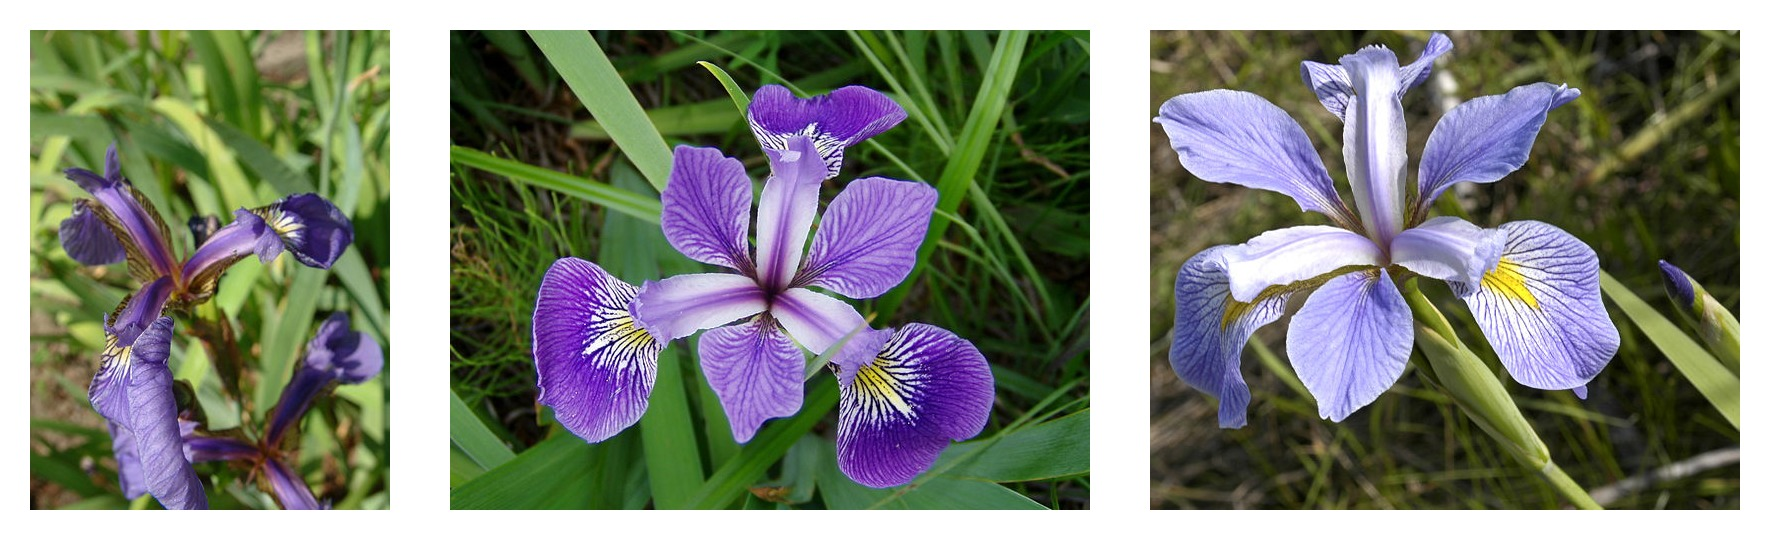

First, make sure iris_data.py is in the same directory you ran Jupyter in, then you should be able to load the data:

In [2]:
import tensorflow as tf
import iris_data

(train_x, train_y), (test_x, test_y) = iris_data.load_data()

Next we gather some information about the columns of this data set:

In [3]:
my_feature_columns = []

for key in train_x.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

#print(my_feature_columns)

We see that measurements have been taken of iris flowers classified into three species with four columns (sepal width, sepal length, petal width, and petal length) describing each flower sample. Refer to [Encyclopaedia Brittanica's article on sepals](https://www.britannica.com/science/sepal) if you don't know what a sepal is!

Next, we request TensorFlow to give us a structure for a model with two 10-unit hidden layers:

In [4]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 10 nodes each.
    hidden_units=[10, 10],
    # The model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4adbaa7f60>, '_master': '', '_task_id': 0, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_evaluation_master': '', '_service': None, '_session_config': None, '_global_id_in_cluster': 0, '_save_summary_steps': 100, '_model_dir': '/tmp/tmp32a47sa_', '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_task_type': 'worker', '_num_worker_replicas': 1, '_keep_checkpoint_max': 5, '_tf_random_seed': None}


This is a DNN, which means a deep neural network classifier. We have the 4 inputs fully connected to a layer of 10 hidden units, which is in turn fully connected to another layer of 10 hidden units.

It looks like this:

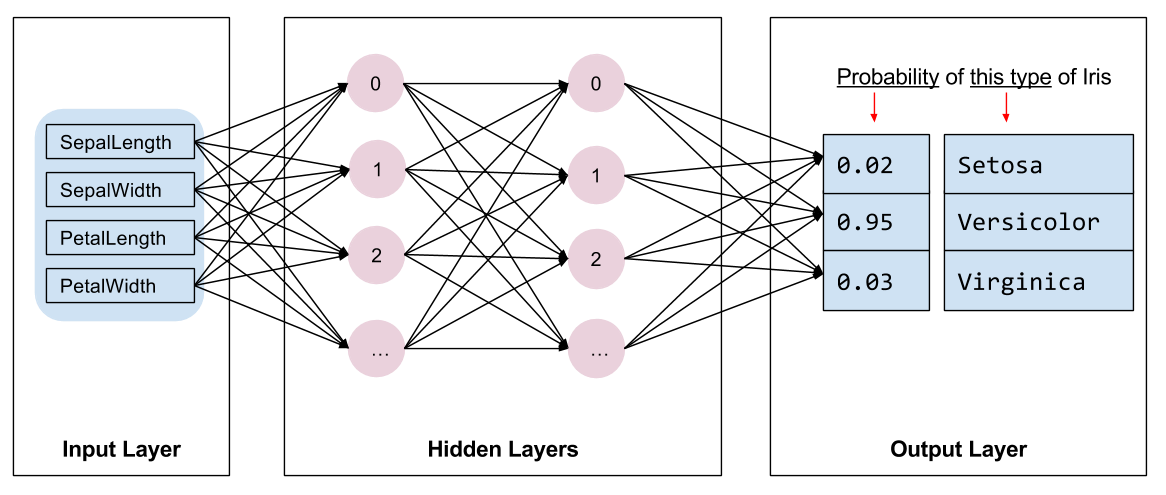

In the TensorFlow API, an *estimator* is a high level representation of a complete neural network model.

Next we train and evaluate the model:

In [5]:
batch_size = 100
train_steps = 1000

# Train the model
classifier.train(
    input_fn=lambda:iris_data.train_input_fn(train_x, train_y, batch_size),
    steps=train_steps)

# Evaluate the model.
eval_result = classifier.evaluate(
    input_fn=lambda:iris_data.eval_input_fn(test_x, test_y, batch_size))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp32a47sa_/model.ckpt.
INFO:tensorflow:loss = 111.64375, step = 1
INFO:tensorflow:global_step/sec: 826.381
INFO:tensorflow:loss = 19.950974, step = 101 (0.121 sec)
INFO:tensorflow:global_step/sec: 1115.51
INFO:tensorflow:loss = 9.315273, step = 201 (0.090 sec)
INFO:tensorflow:global_step/sec: 1145.53
INFO:tensorflow:loss = 7.317396, step = 301 (0.087 sec)
INFO:tensorflow:global_step/sec: 1163.92
INFO:tensorflow:loss = 10.760146, step = 401 (0.086 sec)
INFO:tensorflow:global_step/sec: 1124.92
INFO:tensorflow:loss = 7.705492, step = 501 (0.089 sec)
INFO:tensorflow:global_step/sec: 1056.57
INFO:tensorflow:loss = 6.243563, step = 601 (0.095 sec)
INFO:tensorflow:global_step/sec: 1143.88
INFO:tensorflow:loss

Next we generate some predictions for three specific examples:

In [7]:
# Generate predictions from the model
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

predictions = classifier.predict(
    input_fn=lambda:iris_data.eval_input_fn(predict_x,
                                            labels=None,
                                            batch_size=batch_size))

template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')
for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print(template.format(iris_data.SPECIES[class_id],
                          100 * probability, expec))



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp32a47sa_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

Prediction is "Setosa" (99.8%), expected "Setosa"

Prediction is "Versicolor" (99.4%), expected "Versicolor"

Prediction is "Virginica" (97.0%), expected "Virginica"


Cool, right? See [the TensorFlow Getting Started page on premade estimators](https://www.tensorflow.org/get_started/premade_estimators) for more detail.

## Linear regression

Now, how about a simple linear regression model? This one is from [the TensorFlow main getting started page](https://www.tensorflow.org/versions/r1.1/get_started/get_started).


In [9]:
import numpy as np
import tensorflow as tf

# Declare list of features. We only have one real-valued feature. There are many
# other types of columns that are more complicated and useful.
features = [tf.contrib.layers.real_valued_column("x", dimension=1)]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# logistic regression, linear classification, logistic classification, and
# many neural network classifiers and regressors. The following code
# provides an estimator that does linear regression.
estimator = tf.contrib.learn.LinearRegressor(feature_columns=features)

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use `numpy_input_fn`. We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x = np.array([1., 2., 3., 4.])
y = np.array([0., -1., -2., -3.])
input_fn = tf.contrib.learn.io.numpy_input_fn({"x":x}, y, batch_size=4,
                                              num_epochs=1000)

# We can invoke 1000 training steps by invoking the `fit` method and passing the
# training data set.
estimator.fit(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did. In a real example, we would want
# to use a separate validation and testing data set to avoid overfitting.
print(estimator.evaluate(input_fn=input_fn))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4ad87522e8>, '_master': '', '_task_id': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_evaluation_master': '', '_environment': 'local', '_session_config': None, '_save_summary_steps': 100, '_model_dir': '/tmp/tmpzvbxpldn', '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_task_type': None, '_num_worker_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpzvbxpldn/model.ckpt.
INFO:tensorflow:loss = 0.25, step = 1
INFO:tensorflow:global_step/sec: 1263.1
INFO

## Simple MNIST model

Next, let's build toward try a really deep model, a deep neural network for the MNIST digits database. This tutorial is from [TensorFlow's MNIST tutorial for pros](https://www.tensorflow.org/versions/r1.1/get_started/mnist/pros). That's you, right?

First we'll do a single-layer linear softmax model, then we'll extend the simple model to a more sophisticated CNN. We download the data and read it into memory:

In [21]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Note thata the mnist object contains three data sets: train, validation, and test.

Next we create a session with TensorFlow's back end C++ engine (which runs in a separate process), then start to build up a model, starting with placeholders for the input pattern and the multinomial output.

In [22]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

Next we provide Variables to represent the weights and bias of a simple linear model, then we initialize (to 0 in this example) all variables that have been specified:

In [23]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
sess.run(tf.global_variables_initializer())

With this setup, the model is trivial to specify:

In [24]:
y = tf.matmul(x,W) + b

Now we specify the softmax maximum likelihood loss function (also called cross entropy). Recall that the maximum likelihood loss for logistic regression is

$$J = -\sum_{i=1}^m \left[ (1-y^{(i)}) \log (1-\hat{y}^{(i)}) + y^{(i)} \log \hat{y}^{(i)} \right].$$

Cross entropy is the multi-class generalization of that loss function:

$$J = -\sum_{i=1}^m \sum_{j=1}^c \delta(y^{(i)}=c) \log(\hat{y}^{(i)}_j)$$


This version of the cross entropy loss function is deprecated in TensorFlow but still works:

In [25]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

And now we specify the training methodology (gradient descent on the cross entropy loss function) with learning rate 0.5):

In [30]:
for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

We can evaluate the trained model on the test images as follows. You should get about 92%.

In [31]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9198


## Slightly deep CNN for MNIST

Now we build our first deep model. We begin with some functions to initialize weights and biases, then specify our convolution and max pool operations.

The input tensor will have four dimensions (patterns in the batch, image height, image width, image channel).

Giving strides=\[1, 1, 1, 1\] means we output separate convolutions for each pattern, row, column, and channel of the input.

Padding of 'SAME' means we will 0-pad the image so that the size of the output of each convolution is the same as the size of the input.

Giving ksize=\[1, 2, 2, 1\] for the max pool layer means each max pool operation will work on one pattern, two adjacent rows, two adjacent columns, and one channel of the input. strides=\[1, 2, 2, 1\] means that we will skip every other row and column in the pooling operation (so the max pool outputs will not have overlapping receptive fields).

These are considered "classic" settings for convolutional and max pool layers.

In [33]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')


Next we set up our first convolutional layer, with 32 5x5 single-channel kernels and one bias weight for each convolution. Each convolution is ReLU'ed then max pooled.

To construct the input tensor from a batch of input patterns, we reshape the input patterns to 28x28 single channel images, with -1 for the batch dimension meaning "adjust to the batch size."

In [34]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

the second layer will produce 64 output channels:

In [36]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

Next is a fully-connected layer with 1024 units. The output of the 2nd pooling layer has to be reshaped into a vector.

In [37]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

This model has a lot of parameters!! To reduce overfitting we add a dropout layer, then finally, we add a 10-layer (linear) fully-connected layer, which will be softmaxed for the loss calculation.

In [38]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

Lastly, here's the code to train. It does 20,000 batches of 50 patterns and takes about 30 minutes on my laptop CPU. It will run much faster if you have a GPU. Either way, you should get about 99.2% accuracy on the test set.

Super cool, right?

In [39]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g" % accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.1
step 100, training accuracy 0.8
step 200, training accuracy 0.9
step 300, training accuracy 0.88
step 400, training accuracy 0.98
step 500, training accuracy 0.94
step 600, training accuracy 1
step 700, training accuracy 0.96
step 800, training accuracy 0.92
step 900, training accuracy 0.88
step 1000, training accuracy 0.94
step 1100, training accuracy 0.96
step 1200, training accuracy 1
step 1300, training accuracy 0.96
step 1400, training accuracy 0.94
step 1500, training accuracy 1
step 1600, training accuracy 0.98
step 1700, training accuracy 1
step 1800, training accuracy 1
step 1900, training accuracy 1
step 2000, training accuracy 0.96
step 2100, training accuracy 0.98
step 2200, training accuracy 0.98
step 2300, training accuracy 0.98
step 2400, training accuracy 0.9
step 2500, training accuracy 0.98
step 2600, training accuracy 0.98
step 2700, training accuracy 1
step 2800, training accuracy 0.98
step 2900, training accuracy 0.94
step 3000, traini

## Visualization of network features and output

There is a nice [TensorFlow playgound site](playground.tensorflow.org) that gives some nice insight into how a model is learning, with some simple sample data sets and visualization of the features being induced by the hidden units in the model.  Give it a try!

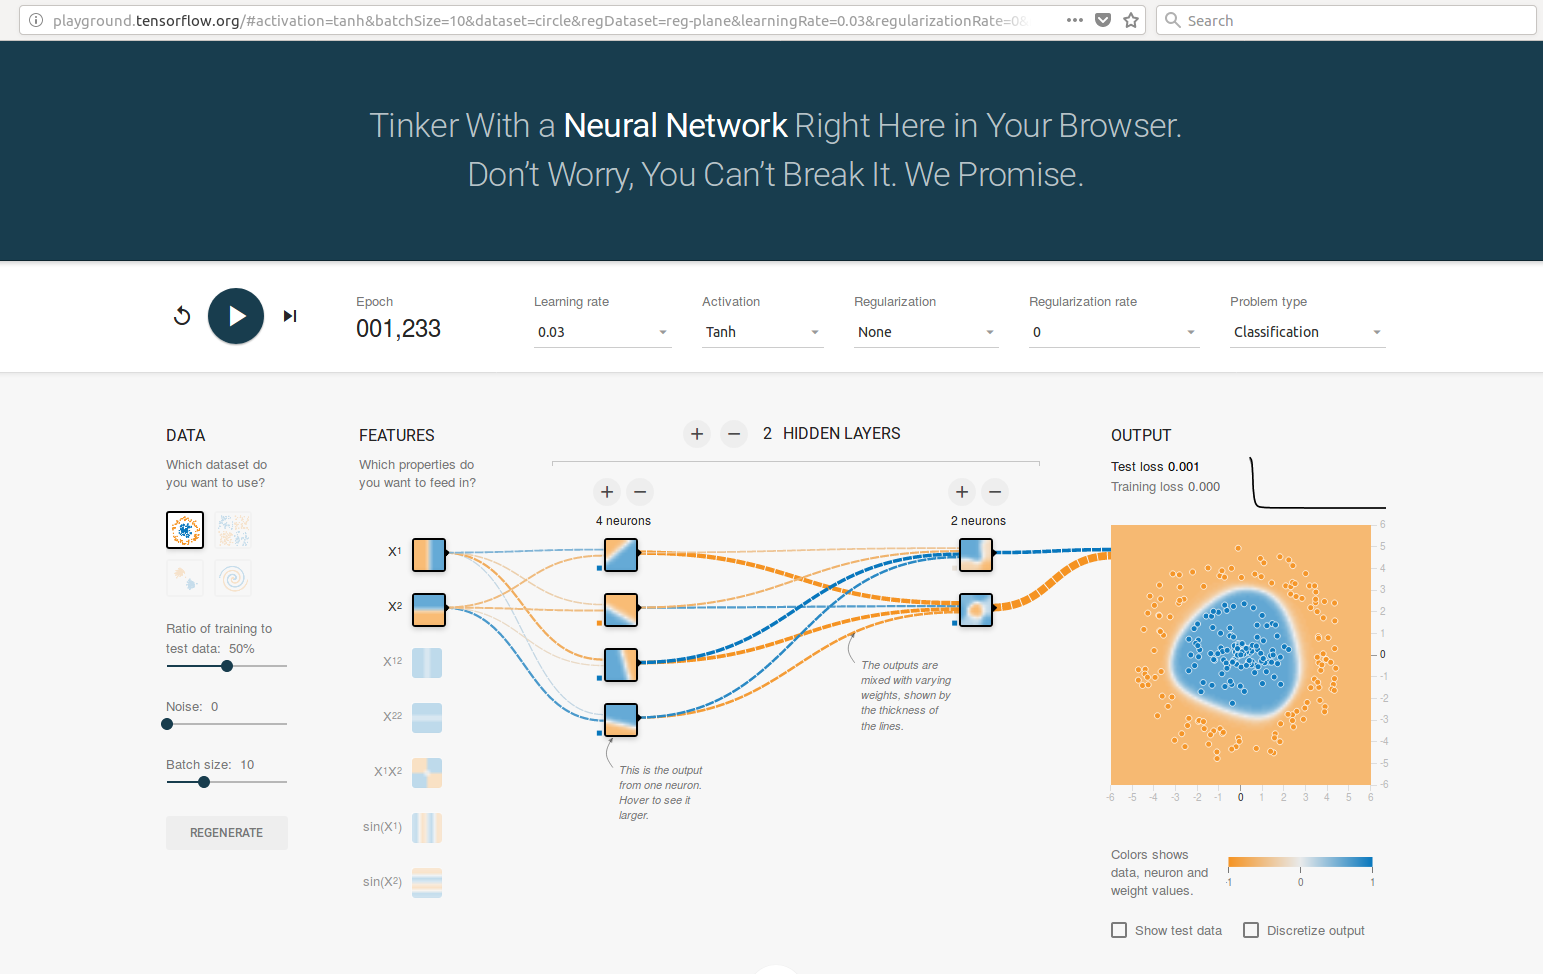
